In [ ]:
from google.colab import drive
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
drive.mount ("Gdrive")

Mounted at Gdrive


In [ ]:
olist_path = "Gdrive/MyDrive/FORMATION DATA/Projet de fin de formation/Données"

olist_path + '/product_info.csv'

'Gdrive/MyDrive/FORMATION DATA/Projet de fin de formation/Données/product_info.csv'

In [ ]:
# Chargement du fichier product_info.csv
df_product_info = pd.read_csv (f'{olist_path}/product_info.csv')



# 1- Inspecter les données pour comprendre leur structure :

In [ ]:

print(df_product_info.head())
print(df_product_info.info())

  product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclusive  \
0             NaN  ...

#2 -  Vérification des types de données:

In [ ]:

print(df_product_info.dtypes)

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object


In [ ]:
df_product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

# 3 - Compter les valeurs manquantes pour chaque colonne :

In [ ]:
print(df_product_info.isnull().sum())

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64


In [ ]:
# Describe() pour les colonnes 'Rating' et 'Reviews'
summary_value_price_usd = df_product_info[['value_price_usd']].describe()

# Afficher le résumé statistique
print(summary_value_price_usd)

       value_price_usd
count       451.000000
mean         91.168537
std          79.195631
min           0.000000
25%          45.000000
50%          67.000000
75%         108.500000
max         617.000000


In [ ]:
# Describe() pour les colonnes 'Rating' et 'Reviews'
summary_sale_price_usd = df_product_info[['sale_price_usd']].describe()

# Afficher le résumé statistique
print(summary_sale_price_usd)

       sale_price_usd
count      270.000000
mean        20.207889
std         24.327352
min          1.750000
25%          8.000000
50%         14.000000
75%         25.000000
max        320.000000


In [ ]:
# Colonne value_price_usd
# Identifier les zéros et les valeurs manquantes
zero_prices = df_product_info['value_price_usd'] == 0
missing_values = df_product_info['value_price_usd'].isnull()

# Calculer la médiane sans tenir compte des zéros ni des valeurs manquantes
median_price = df_product_info.loc[~zero_prices & ~missing_values, 'value_price_usd'].median()

# Remplacer les zéros par la médiane
df_product_info.loc[zero_prices, 'value_price_usd'] = median_price

# Remplacer les valeurs manquantes par la médiane
df_product_info['value_price_usd'].fillna(median_price, inplace=True)

# Vérifier le résultat
print(df_product_info['value_price_usd'].describe())


count    8494.000000
mean       69.246175
std        18.925654
min        12.000000
25%        68.000000
50%        68.000000
75%        68.000000
max       617.000000
Name: value_price_usd, dtype: float64


**4 - Décider de la manière de gérer les valeurs manquantes :**

In [ ]:
# Colonne sale_price_usd
# Identifier les zéros et les valeurs manquantes

missing_values = df_product_info['sale_price_usd'].isnull()

# Calculer la médiane sans tenir compte des zéros ni des valeurs manquantes
median_price = df_product_info.loc[~zero_prices & ~missing_values, 'sale_price_usd'].median()
# Remplacer les valeurs manquantes par la médiane
df_product_info['sale_price_usd'].fillna(median_price, inplace=True)

# Vérifier le résultat
print(df_product_info['sale_price_usd'].describe())

count    8494.000000
mean       14.197331
std         4.464416
min         1.750000
25%        14.000000
50%        14.000000
75%        14.000000
max       320.000000
Name: sale_price_usd, dtype: float64


In [ ]:
# Describe() pour les colonnes 'Rating' et 'Reviews'
summary_price_usd = df_product_info[['price_usd']].describe()

# Afficher le résumé statistique
print(summary_price_usd)

         price_usd
count  8494.000000
mean     51.655595
std      53.669234
min       3.000000
25%      25.000000
50%      35.000000
75%      58.000000
max    1900.000000


In [ ]:
# Compter le nombre de zéros dans la colonne value_price_usd
number_of_zeros = (df_product_info['value_price_usd'] == 0).sum()

print(f'Nombre de zéros dans la colonne value_price_usd: {number_of_zeros}')

Nombre de zéros dans la colonne value_price_usd: 0


In [ ]:
# Supprimer les colonnes inutiles :
df_product_info.drop(columns=['child_max_price'], inplace=True)
df_product_info.drop(columns=['child_min_price'], inplace=True)
df_product_info.drop(columns=['variation_desc'], inplace=True)
df_product_info.drop(columns=['size'], inplace=True)
df_product_info.drop(columns=['variation_type'], inplace=True)
#df_product_info.drop(columns=['variation_value'], inplace=True))
df_product_info.drop(columns=['highlights'], inplace=True)
df_product_info.drop(columns=['tertiary_category'], inplace=True)
#df_product_info.drop(columns=['sale_price_usd'], inplace=True)
#df_product_info.drop(columns=['value_price_usd'], inplace=True)
df_product_info.drop(columns=['ingredients'], inplace=True)



# 5 - Traitement de la colonne product_id

In [ ]:
# Vérifier si 'product_id' est unique
is_unique_product_id = df_product_info['product_id'].is_unique

# Identifier les doublons
if not is_unique_product_id:
    duplicate_ids = df_product_info[df_product_info['product_id'].duplicated(keep=False)]

# Afficher les résultats
print(f"L'identifiant du produit est unique: {is_unique_product_id}")
if not is_unique_product_id:
    print(f"Produits avec des identifiants en double : \n{duplicate_ids}")

L'identifiant du produit est unique: True


In [ ]:
# Contrôle de cohérence :
# Assurer que les product_id correspondent aux bons product_name

consistency_check = df_product_info.groupby('product_id')['product_name'].nunique().max() == 1

# Afficher le résultat du contrôle de cohérence
print("Chaque product_id correspond à un seul product_name:", consistency_check)

Chaque product_id correspond à un seul product_name: True


# 6 - Chercher les lignes doublons:

In [ ]:
# Trouver les doublons
duplicates = df_product_info.duplicated(keep=False)

# Compter le nombre total de doublons
num_duplicates = duplicates.sum()

print(f"Nombre de lignes doublons dans le DataFrame: {num_duplicates}")

# Afficher les lignes doublons pour inspection
duplicated_rows = df_product_info[duplicates]
print(duplicated_rows)

Nombre de lignes doublons dans le DataFrame: 0
Empty DataFrame
Columns: [product_id, product_name, brand_id, brand_name, loves_count, rating, reviews, variation_value, price_usd, value_price_usd, sale_price_usd, limited_edition, new, online_only, out_of_stock, sephora_exclusive, primary_category, secondary_category, child_count, savings]
Index: []


**7 - Normaliser les données textuelles :**

In [ ]:
# Nettoyage des noms de produits
df_product_info['product_name'] = df_product_info['product_name'].str.strip()  # Supprimer les espaces superflus
df_product_info['product_name'] = df_product_info['product_name'].str.lower()  # Uniformisation en minuscules
df_product_info['product_name'] = df_product_info['product_name'].str.replace('[^\w\s]', '')  # Supprimer les caractères spéciaux


<ipython-input-21-a4af34d16487>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_product_info['product_name'] = df_product_info['product_name'].str.replace('[^\w\s]', '')  # Supprimer les caractères spéciaux


# 8 - Traitement dela colonne brand_id:

In [ ]:
# Colonne Brand_id
# Convertir en type numérique
df_product_info['brand_id'] = pd.to_numeric(df_product_info['brand_id'], errors='coerce')

# Identifier les valeurs qui n'ont pas pu être converties
invalid_brand_ids = df_product_info[df_product_info['brand_id'].isnull()]

# Vérifier l'association unique brand_id -> brand_name
brand_checks = df_product_info.groupby('brand_id')['brand_name'].nunique()
inconsistent_brands = brand_checks[brand_checks > 1]
# S'assurer que brand_id est un entier
df_product_info['brand_id'] = df_product_info['brand_id'].astype(int)

# 9 -  Traitement de la colonne loves_count

In [ ]:
# Convertir en entier, avec gestion des valeurs non numériques
df_product_info['loves_count'] = pd.to_numeric(df_product_info['loves_count'], errors='coerce')

count    8.494000e+03
mean     2.917957e+04
std      6.609212e+04
min      0.000000e+00
25%      3.758000e+03
50%      9.880000e+03
75%      2.684125e+04
max      1.401068e+06
Name: loves_count, dtype: float64


<Axes: xlabel='loves_count', ylabel='Count'>

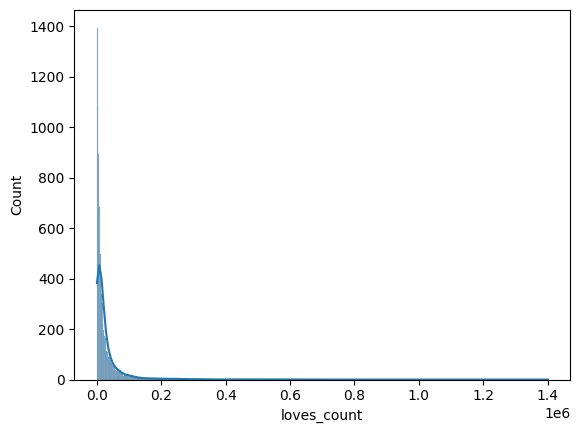

In [ ]:
# Statistiques de base
print(df_product_info['loves_count'].describe())

# Visualisation
import seaborn as sns
sns.histplot(df_product_info['loves_count'], kde=True)


# 14 - Traitement de la colonne price_USD

Empty DataFrame
Columns: [product_id, product_name, brand_id, brand_name, loves_count, rating, reviews, variation_value, price_usd, value_price_usd, sale_price_usd, limited_edition, new, online_only, out_of_stock, sephora_exclusive, primary_category, secondary_category, child_count, savings]
Index: []


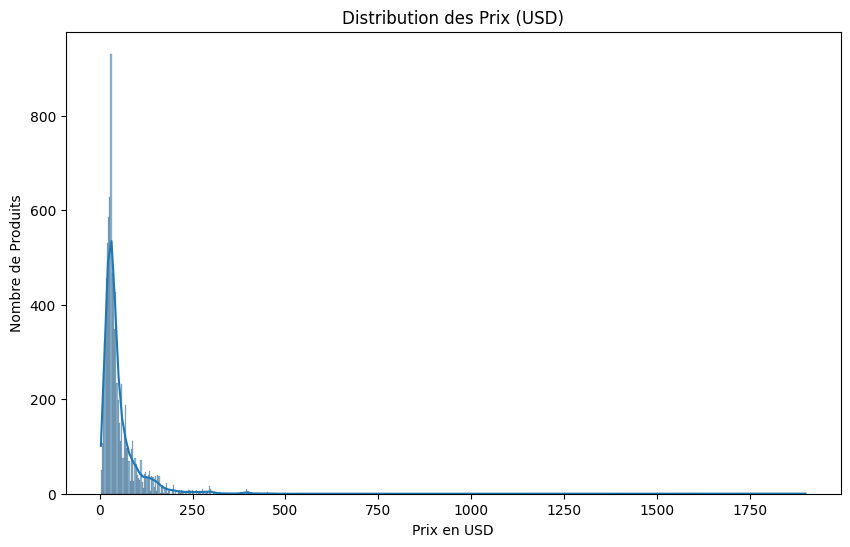

In [ ]:
# Convertir en type numérique en supprimant les symboles de devise et en convertissant en float
df_product_info['price_usd'] = df_product_info['price_usd'].replace('[\$,]', '', regex=True).astype(float)

# Vérification des valeurs négatives
print(df_product_info[df_product_info['price_usd'] < 0])

# Visualisation de la distribution des prix


plt.figure(figsize=(10, 6))
sns.histplot(df_product_info['price_usd'], kde=True)
plt.title('Distribution des Prix (USD)')
plt.xlabel('Prix en USD')
plt.ylabel('Nombre de Produits')
plt.show()


# 10 - Traitement de la colonne limited_edition :

In [ ]:
# Vérifier les valeurs uniques
print(df_product_info['limited_edition'].unique())

# Convertir la colonne en type entier
df_product_info['limited_edition'] = df_product_info['limited_edition'].astype(int)

# Vérifier de nouveau les valeurs uniques pour s'assurer que le traitement a fonctionné
print(df_product_info['limited_edition'].unique())


[0 1]
[0 1]


# 11 - Traitement de la colonne new :

In [ ]:
# Vérifier les valeurs uniques
print(df_product_info['new'].unique())

# Convertir la colonne en type entier
df_product_info['new'] = df_product_info['new'].astype(int)

# Vérifier de nouveau les valeurs uniques pour s'assurer que le traitement a fonctionné
print(df_product_info['new'].unique())

[0 1]
[0 1]


# 12 - Traitement de la colonne online_only :

In [ ]:
# Vérifier les valeurs uniques
print(df_product_info['online_only'].unique())

# Convertir la colonne en type entier
df_product_info['online_only'] = df_product_info['online_only'].astype(int)

# Vérifier de nouveau les valeurs uniques pour s'assurer que le traitement a fonctionné
print(df_product_info['online_only'].unique())

[1 0]
[1 0]


# 13 - Traitement de la colonne out_of_stock :

In [ ]:
print(df_product_info['out_of_stock'].unique())

# Convertir la colonne en type entier
df_product_info['out_of_stock'] = df_product_info['out_of_stock'].astype(int)

# Vérifier de nouveau les valeurs uniques pour s'assurer que le traitement a fonctionné
print(df_product_info['online_only'].unique())

[0 1]
[1 0]


# 14 - Traitement de la colonne sephora_exclusive :

In [ ]:
print(df_product_info['sephora_exclusive'].unique())

# Convertir la colonne en type entier
df_product_info['sephora_exclusive'] = df_product_info['sephora_exclusive'].astype(int)

# Vérifier de nouveau les valeurs uniques pour s'assurer que le traitement a fonctionné
print(df_product_info['sephora_exclusive'].unique())

[0 1]
[0 1]


# 15 - Traitement de la colonne primary_category :

In [ ]:
# Normalisation des catégories
df_product_info['primary_category'] = df_product_info['primary_category'].str.strip()  # Supprimer les espaces superflus
df_product_info['primary_category'] = df_product_info['primary_category'].str.lower()  # Uniformiser en minuscules
df_product_info['primary_category'] = df_product_info['primary_category'].str.replace('[^\w\s]', '')  # Supprimer les caractères spéciaux

# Convertir en type catégoriel
df_product_info['primary_category'] = df_product_info['primary_category'].astype('category')

# Vérifier les catégories uniques
print(df_product_info['primary_category'].unique())



['fragrance', 'bath  body', 'mini size', 'hair', 'makeup', 'skincare', 'tools  brushes', 'men', 'gifts']
Categories (9, object): ['bath  body', 'fragrance', 'gifts', 'hair', ..., 'men', 'mini size', 'skincare',
                         'tools  brushes']


<ipython-input-34-2c2b5c5ab3a3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_product_info['primary_category'] = df_product_info['primary_category'].str.replace('[^\w\s]', '')  # Supprimer les caractères spéciaux


# 16 - Traitement de la colonne child_count:

In [ ]:
# Vérifier la présence de valeurs NaN dans 'child_count'
nan_in_child_count = df_product_info['child_count'].isnull().sum()

# Vérifier le type de données de 'child_count'
child_count_dtype = df_product_info['child_count'].dtype

# Afficher les résultats
print(f"Nombre de valeurs NaN dans 'child_count': {nan_in_child_count}")
print(f"Type de données de 'child_count': {child_count_dtype}")


Nombre de valeurs NaN dans 'child_count': 0
Type de données de 'child_count': int64


In [ ]:
df_product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   product_id          8494 non-null   object  
 1   product_name        8494 non-null   object  
 2   brand_id            8494 non-null   int64   
 3   brand_name          8494 non-null   object  
 4   loves_count         8494 non-null   int64   
 5   rating              8216 non-null   float64 
 6   reviews             8216 non-null   float64 
 7   variation_value     6896 non-null   object  
 8   price_usd           8494 non-null   float64 
 9   value_price_usd     8494 non-null   float64 
 10  sale_price_usd      8494 non-null   float64 
 11  limited_edition     8494 non-null   int64   
 12  new                 8494 non-null   int64   
 13  online_only         8494 non-null   int64   
 14  out_of_stock        8494 non-null   int64   
 15  sephora_exclusive   8494 non-null   in

In [ ]:
print(df_product_info.isnull().sum())

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
variation_value       1598
price_usd                0
value_price_usd          0
sale_price_usd           0
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
primary_category         0
secondary_category       8
child_count              0
savings                  0
dtype: int64


In [ ]:
# Describe() pour les colonnes 'Rating' et 'Reviews'
summary = df_product_info[['rating', 'reviews']].describe()

# Afficher le résumé statistique
print(summary)

            rating       reviews
count  8216.000000   8216.000000
mean      4.194513    448.545521
std       0.516694   1101.982529
min       1.000000      1.000000
25%       3.981725     26.000000
50%       4.289350    122.000000
75%       4.530525    418.000000
max       5.000000  21281.000000


In [ ]:
# Remplacer les valeurs manquantes dans 'Rating' par la moyenne
df_product_info['rating'].fillna(df_product_info['rating'].mean(), inplace=True)

# Remplacer les valeurs manquantes dans 'Reviews' par la médiane
df_product_info['reviews'].fillna(df_product_info['reviews'].median(), inplace=True)

# Afficher le DataFrame après remplacement
df_product_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   product_id          8494 non-null   object  
 1   product_name        8494 non-null   object  
 2   brand_id            8494 non-null   int64   
 3   brand_name          8494 non-null   object  
 4   loves_count         8494 non-null   int64   
 5   rating              8494 non-null   float64 
 6   reviews             8494 non-null   float64 
 7   variation_value     6896 non-null   object  
 8   price_usd           8494 non-null   float64 
 9   value_price_usd     8494 non-null   float64 
 10  sale_price_usd      8494 non-null   float64 
 11  limited_edition     8494 non-null   int64   
 12  new                 8494 non-null   int64   
 13  online_only         8494 non-null   int64   
 14  out_of_stock        8494 non-null   int64   
 15  sephora_exclusive   8494 non-null   in

In [ ]:
# Renommer la colonne 'Rating' en 'Rating_Note_Moyenne'
df_product_info.rename(columns={'rating': 'rating_note_moyenne'}, inplace=True)

# Vérifier le changement
df_product_info.head()


,product_id,product_name,brand_id,brand_name,loves_count,rating_note_moyenne,reviews,variation_value,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category,child_count,savings
0,P473671,fragrance discovery set,6342,19-69,6320,3.6364,11.0,NaN,35.0,68.0,14.0,0,0,1,0,0,fragrance,Value & Gift Sets,0,33.0
1,P473668,la habana eau de parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,195.0,68.0,14.0,0,0,1,0,0,fragrance,Women,2,-127.0
2,P473662,rainbow bar eau de parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,195.0,68.0,14.0,0,0,1,0,0,fragrance,Women,2,-127.0
3,P473660,kasbah eau de parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,195.0,68.0,14.0,0,0,1,0,0,fragrance,Women,2,-127.0
4,P473658,purple haze eau de parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,195.0,68.0,14.0,0,0,1,0,0,fragrance,Women,2,-127.0


**Fusion Fichers Reviews et Fichier Product**

In [ ]:
olist_path = "Gdrive/MyDrive/FORMATION DATA/Projet de fin de formation/Data Cleaned"

olist_path + '/reviews_all_cleaned.csv'

'Gdrive/MyDrive/FORMATION DATA/Projet de fin de formation/Data Cleaned/reviews_all_cleaned.csv'

In [ ]:
# Chargement du fichier reviews_all_cleaned.csv
df_reviews_all_cleaned = pd.read_csv (f'{olist_path}/reviews_all_cleaned.csv')

In [ ]:
df_reviews_all_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094347 entries, 0 to 1094346
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0                 1094347 non-null  int64  
 1   author_id                  1094347 non-null  int64  
 2   rating                     1094347 non-null  int64  
 3   is_recommended             1094347 non-null  float64
 4   helpfulness                532779 non-null   float64
 5   total_feedback_count       1094347 non-null  int64  
 6   total_neg_feedback_count   1094347 non-null  int64  
 7   total_pos_feedback_count   1094347 non-null  int64  
 8   submission_time            1094347 non-null  object 
 9   skin_tone                  1094347 non-null  object 
 10  eye_color                  1094347 non-null  object 
 11  skin_type                  1094347 non-null  object 
 12  hair_color                 1094347 non-null  object 
 13  product_id  

In [ ]:
print(df_merged.isnull().sum())

product_id                        0
product_name_x                    0
brand_id                          0
brand_name_x                      0
loves_count                       0
rating_note_moyenne               0
reviews                           0
variation_value               63425
price_usd_x                       0
value_price_usd                   0
sale_price_usd                    0
limited_edition                   0
new                               0
online_only                       0
out_of_stock                      0
sephora_exclusive                 0
primary_category                  0
secondary_category                0
child_count                       0
savings                           0
Unnamed: 0                        0
author_id                         0
rating                            0
is_recommended                    0
helpfulness                  561568
total_feedback_count              0
total_neg_feedback_count          0
total_pos_feedback_count    

In [ ]:
# Convertir les valeurs en minuscules pour les deux colonnes pour éviter les incohérences de casse
df_merged['brand_name_x'] = df_merged['brand_name_x'].str.lower()
df_merged['brand_name_y'] = df_merged['brand_name_y'].str.lower()

# Identifier les lignes où les noms des produits ne correspondent pas après normalisation de la casse
inconsistencies_product_name = df_merged[df_merged['brand_name_x'] != df_merged['brand_name_y']]

# Afficher les incohérences trouvées
if not inconsistencies_product_name.empty:
    print("Incohérences trouvées dans 'brand_name' après normalisation de la casse:")
    print(inconsistencies_product_name[['product_id', 'brand_name_x', 'brand_name_y']])
else:
    print("Pas d'incohérences trouvées dans 'brand_name' après normalisation de la casse.")

Pas d'incohérences trouvées dans 'brand_name' après normalisation de la casse.


In [ ]:
# Renommer 'brand_name_x' en 'brand_name'
df_merged.rename(columns={'brand_name_x': 'brand_name'}, inplace=True)

# Supprimer 'brand_name_y'
df_merged.drop(columns=['brand_name_y'], inplace=True)


In [ ]:
# Vérifier l'égalité exacte des prix
df_merged['price_equal'] = df_merged['price_usd_x'] == df_merged['price_usd_y']

# Identifier où les prix diffèrent
price_differences = df_merged[~df_merged['price_equal']]

# Afficher les différences de prix
if not price_differences.empty:
    print("Différences de prix trouvées:")
    print(price_differences[['product_id', 'price_usd_x', 'price_usd_y']])
else:
    print("Pas de différences de prix trouvées.")

Pas de différences de prix trouvées.


In [ ]:
# Concerver une seule colonne de prix, par exemple 'price_USD_x'
df_merged.rename(columns={'price_usd_x': 'price_usd'}, inplace=True)
df_merged.drop(columns=['price_usd_y'], inplace=True)


In [ ]:
# Supression de ces colonnes
df_merged.drop(columns=['helpfulness', 'helpfulness_difference','review_length','unique_word_count','price_equal'], inplace=True)


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094347 entries, 0 to 1094346
Data columns (total 42 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   product_id                 1094347 non-null  object  
 1   product_name_x             1094347 non-null  object  
 2   brand_id                   1094347 non-null  int64   
 3   brand_name_x               1094347 non-null  object  
 4   loves_count                1094347 non-null  int64   
 5   rating_note_moyenne        1094347 non-null  float64 
 6   reviews                    1094347 non-null  float64 
 7   variation_value            1030922 non-null  object  
 8   price_usd                  1094347 non-null  float64 
 9   value_price_usd            1094347 non-null  float64 
 10  sale_price_usd             1094347 non-null  float64 
 11  limited_edition            1094347 non-null  int64   
 12  new                        1094347 non-null  int64   
 1

In [ ]:
df_merged.head()

,product_id,product_name_x,brand_id,brand_name_x,loves_count,rating_note_moyenne,reviews,variation_value,price_usd,value_price_usd,...,hair_color,product_name_y,brand_name_y,is_recommended_calculated,helpfulness_calculated,helpfulness_difference,review_length,unique_word_count,review_age_days,price_equal
0,P439055,genius sleeping collagen moisturizer,6018,algenist,33910,4.5413,1321.0,2 oz/ 60 mL,98.0,68.0,...,black,genius sleeping collagen moisturizer,algenist,Recommandé,1.000000,0.0,250,39,40,True
1,P439055,genius sleeping collagen moisturizer,6018,algenist,33910,4.5413,1321.0,2 oz/ 60 mL,98.0,68.0,...,inconnu,genius sleeping collagen moisturizer,algenist,Recommandé,0.333333,0.0,221,36,67,True
2,P439055,genius sleeping collagen moisturizer,6018,algenist,33910,4.5413,1321.0,2 oz/ 60 mL,98.0,68.0,...,inconnu,genius sleeping collagen moisturizer,algenist,Recommandé,1.000000,0.0,354,57,102,True
3,P439055,genius sleeping collagen moisturizer,6018,algenist,33910,4.5413,1321.0,2 oz/ 60 mL,98.0,68.0,...,blonde,genius sleeping collagen moisturizer,algenist,Recommandé,0.800000,0.0,376,62,110,True
4,P439055,genius sleeping collagen moisturizer,6018,algenist,33910,4.5413,1321.0,2 oz/ 60 mL,98.0,68.0,...,blonde,genius sleeping collagen moisturizer,algenist,Non Recommandé,0.111111,0.0,107,20,134,True


In [ ]:
# Sauvegarder le DataFrame nettoyé dans un nouveau fichier CSV :
df_merged.to_csv('sephora_cleaned.csv', index=False)